In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy.stats import gaussian_kde as GKDE

from scipy.stats import multivariate_normal
from scipy.stats import norm

import weightedCDFs as wCDFs
import weights

import random

import matplotlib.patches as patches

import seaborn as sns

In [2]:
import torch, time
from mpl_toolkits import mplot3d

In [3]:
random.seed(20)

In [4]:
# Redefine the parameters of the model
D_in, D_out = 100, 3
H1, H2, H3, H4, H5 = 80, 60, 40, 20, 10

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, H4),
    torch.nn.ReLU(),
    torch.nn.Linear(H4, H5),
    torch.nn.ReLU(),
    torch.nn.Linear(H5, D_out),
)

# Read in the previously trained model
model.load_state_dict(torch.load('./trained_model.pt'))

<All keys matched successfully>

In [5]:
n_init_samples = 10000
init_samples = np.random.multivariate_normal(np.zeros(100), np.identity(100), n_init_samples)
init_samples = torch.from_numpy(init_samples).float()

pred_samples_full = model(init_samples)
pred_samples_full = pred_samples_full.detach().numpy()

init_samples = init_samples.detach().numpy()

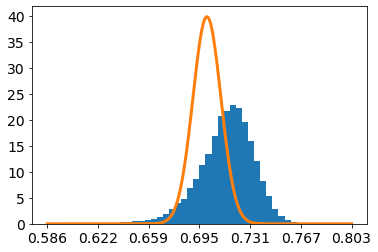

In [6]:
plt.hist(pred_samples_full[:,0], bins=50, density=True);
xx = np.linspace(np.min(pred_samples_full[:,0]), np.max(pred_samples_full[:,0]), 1000)
plt.plot(xx, norm(0.7,0.01).pdf(xx), linewidth=3);
plt.xticks(ticks=np.linspace(np.min(xx), np.max(xx), 7),
           labels=["{:.3f}".format(x) for x in np.linspace(np.min(xx), np.max(xx), 7)],
           fontsize=14)
plt.yticks(fontsize=14);

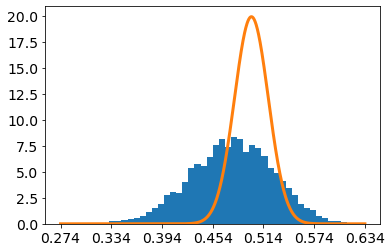

In [7]:
plt.hist(pred_samples_full[:,2], bins=50, density=True);
xx = np.linspace(np.min(pred_samples_full[:,2]), np.max(pred_samples_full[:,2]), 1000)
plt.plot(xx, norm(0.5, 0.02).pdf(xx), linewidth=3);
plt.xticks(ticks=np.linspace(np.min(xx), np.max(xx), 7),
           labels=["{:.3f}".format(x) for x in np.linspace(np.min(xx), np.max(xx), 7)],
           fontsize=14)
plt.yticks(fontsize=14);

In [8]:
n_obs_samples = 5000

obs_samples = np.zeros((n_obs_samples, 2))
obs_samples[:,0] = np.random.normal(0.7, 0.01, (n_obs_samples,))
obs_samples[:,1] = np.random.normal(0.5, 0.02, (n_obs_samples,))

In [9]:
pred_samples = pred_samples_full[:,[0,2]]

print(np.shape(obs_samples))
print(np.shape(pred_samples))

(5000, 2)
(10000, 2)


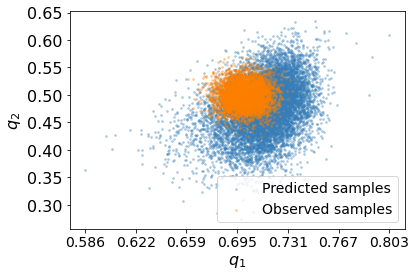

In [10]:
plt.scatter(pred_samples[:,0], pred_samples[:,1], alpha=0.3, label='Predicted samples', color='#377eb8', s=3)
plt.scatter(obs_samples[:,0], obs_samples[:,1], alpha=0.3, label='Observed samples', color='#ff7f00', s=3)
plt.xticks(ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.3f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)],
           fontsize=14);
plt.xlabel('$q_1$', fontsize=16)
plt.ylabel('$q_2$', fontsize=16)
plt.legend(fontsize=14)
plt.yticks(fontsize=16);
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_D_samples.png', bbox_inches='tight')

In [11]:
pred_KDE = GKDE(pred_samples.T)
obs_KDE = GKDE(obs_samples.T)
r = obs_KDE(pred_samples.T) / pred_KDE(pred_samples.T)
rn_w = r / n_init_samples
PF_update_KDE = GKDE(pred_samples.T, weights=rn_w)

print(np.mean(r))

0.9984842450551856


In [54]:
n_clusters = 600
w, labels, centers, w_cluster = weights.computePartitionedWeights_kMeans_IID(init_samples,
                                                                             pred_samples,
                                                                             sample_set_2=obs_samples,
                                                                             n_clusters=n_clusters)

     pcost       dcost       gap    pres   dres
 0: -6.7213e-02 -6.0009e+02  6e+02  6e-16  5e+01
 1: -6.7213e-02 -6.0924e+00  6e+00  5e-15  5e-01
 2: -6.7272e-02 -1.5229e-01  9e-02  5e-15  7e-03
 3: -6.9720e-02 -8.9787e-02  2e-02  4e-15  2e-03
 4: -7.3992e-02 -9.2261e-02  2e-02  2e-14  7e-04
 5: -7.5605e-02 -7.9759e-02  4e-03  1e-14  1e-04
 6: -7.6377e-02 -7.9032e-02  3e-03  2e-14  1e-18
 7: -7.6694e-02 -7.7299e-02  6e-04  2e-14  9e-19
 8: -7.6804e-02 -7.7032e-02  2e-04  1e-14  9e-19
 9: -7.6839e-02 -7.6899e-02  6e-05  2e-14  1e-18
10: -7.6850e-02 -7.6865e-02  2e-05  1e-14  9e-19
11: -7.6853e-02 -7.6858e-02  5e-06  1e-14  9e-19
12: -7.6854e-02 -7.6855e-02  1e-06  1e-14  9e-19
13: -7.6854e-02 -7.6855e-02  7e-07  1e-14  1e-18
14: -7.6854e-02 -7.6855e-02  2e-07  1e-14  9e-19
15: -7.6854e-02 -7.6855e-02  2e-07  1e-14  9e-19
16: -7.6854e-02 -7.6854e-02  4e-08  1e-14  1e-18
Optimal solution found.


/var/folders/0h/yvwpnbtd37l25kkvtssf6gtc0000gn/T/ipykernel_58549/201634648.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(w), np.max(w), 9)],


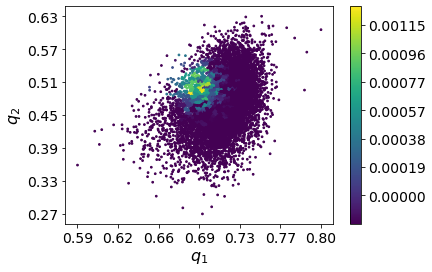

In [55]:
plt.scatter(pred_samples[:,0], pred_samples[:,1], cmap='viridis', c=w, s=3)
plt.xlabel('$q_1$', fontsize=16)
plt.ylabel('$q_2$', fontsize=16)
plt.xticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)])
plt.yticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7)])

cbar = plt.colorbar();
cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(w), np.max(w), 9)],
                        fontsize=14);
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kmeans_2d.png', bbox_inches='tight')

/var/folders/0h/yvwpnbtd37l25kkvtssf6gtc0000gn/T/ipykernel_58549/607560235.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(rn_w), np.max(rn_w), 9)],


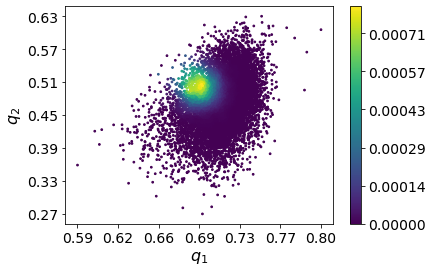

In [56]:
plt.scatter(pred_samples[:,0], pred_samples[:,1], cmap='viridis', c=rn_w, s=3)
plt.xlabel('$q_1$', fontsize=16)
plt.ylabel('$q_2$', fontsize=16)
plt.xticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)])
plt.yticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7)])

cbar = plt.colorbar();
cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(rn_w), np.max(rn_w), 9)],
                        fontsize=14);
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_rn_2d.png', bbox_inches='tight')

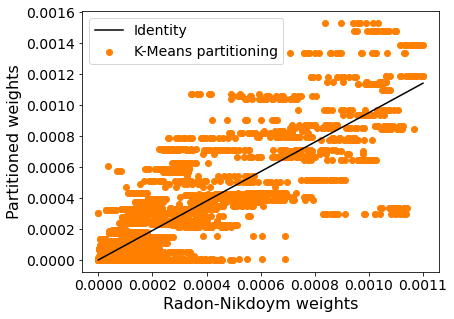

In [57]:
plt.figure(figsize=(6.4,4.8))
plt.plot(np.linspace(0, np.max(rn_w), 1000),
         np.linspace(0, np.max(rn_w), 1000), color='k', label='Identity')

plt.xlabel('Radon-Nikdoym weights', fontsize=16)
plt.ylabel('Partitioned weights', fontsize=16)
plt.scatter(rn_w, w, label='K-Means partitioning', color='#ff7f00')
plt.xticks(fontsize=14,
           ticks=np.linspace(np.min(rn_w), np.max(rn_w), 7),
           labels=["{:.4f}".format(x) for x in np.linspace(np.min(w), np.max(rn_w), 7)])
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kmeans_2d_comp.png', bbox_inches='tight')

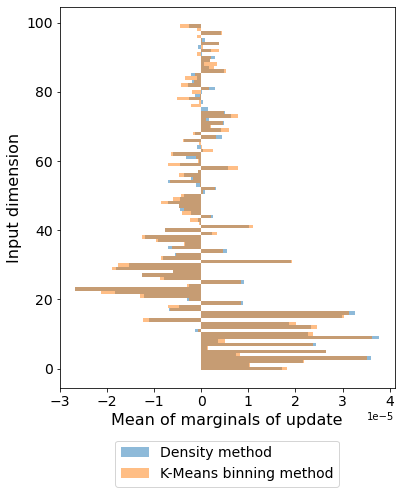

In [58]:
means_rn = np.mean((init_samples.T * rn_w).T, axis=0)
means_opt = np.mean((init_samples.T * w).T, axis=0)

plt.figure(figsize=(6,7))
plt.barh(range(100), means_rn, alpha=0.5, height=1, label='Density method')
plt.barh(range(100), means_opt, alpha=0.5, height=1, label='K-Means binning method')
plt.xlabel('Mean of marginals of update', fontsize=16)
plt.ylabel('Input dimension', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='center', bbox_to_anchor=(0.5, -0.2))
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kl_kmeans_2d.png', bbox_inches='tight')

In [46]:
n_bins = [32, 30]
w, labels, centers, w_cluster = weights.computePartitionedWeights_regulargrid_IID(init_samples,
                                                                                  pred_samples,
                                                                                  sample_set_2=obs_samples,
                                                                                  n_bins=n_bins,
                                                                                  remove_empty_bins=True)
print(len(centers))

     pcost       dcost       gap    pres   dres
 0: -5.1570e-02 -9.6011e+02  1e+03  8e-16  6e+01
 1: -5.1572e-02 -9.7050e+00  1e+01  8e-15  6e-01
 2: -5.1703e-02 -2.0089e-01  1e-01  6e-15  1e-02
 3: -5.5991e-02 -1.0143e-01  5e-02  6e-15  3e-03
 4: -6.6559e-02 -1.1406e-01  5e-02  3e-14  2e-03
 5: -7.1265e-02 -8.1151e-02  1e-02  1e-14  3e-04
 6: -7.3472e-02 -7.9561e-02  6e-03  6e-14  2e-05
 7: -7.4629e-02 -7.6198e-02  2e-03  2e-14  4e-06
 8: -7.4903e-02 -7.5651e-02  7e-04  6e-14  3e-07
 9: -7.5013e-02 -7.5434e-02  4e-04  4e-14  1e-07
10: -7.5090e-02 -7.5290e-02  2e-04  3e-14  2e-08
11: -7.5143e-02 -7.5195e-02  5e-05  3e-14  3e-09
12: -7.5156e-02 -7.5175e-02  2e-05  3e-14  9e-19
13: -7.5160e-02 -7.5166e-02  6e-06  3e-14  9e-19
14: -7.5162e-02 -7.5164e-02  2e-06  3e-14  1e-18
15: -7.5162e-02 -7.5163e-02  5e-07  3e-14  9e-19
16: -7.5163e-02 -7.5163e-02  1e-07  3e-14  1e-18
17: -7.5163e-02 -7.5163e-02  4e-08  3e-14  1e-18
Optimal solution found.
960


/var/folders/0h/yvwpnbtd37l25kkvtssf6gtc0000gn/T/ipykernel_58549/694850602.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(w), np.max(w), 9)],


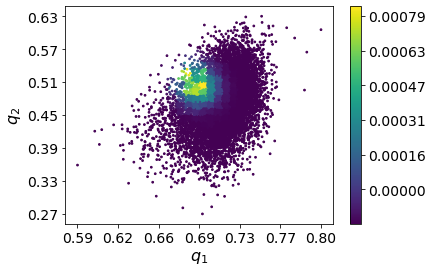

In [47]:
plt.scatter(pred_samples[:,0], pred_samples[:,1], cmap='viridis', c=w, s=3)
plt.xlabel('$q_1$', fontsize=16)
plt.ylabel('$q_2$', fontsize=16)
plt.xticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)])
plt.yticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7)])

cbar = plt.colorbar();
cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(w), np.max(w), 9)],
                        fontsize=14);
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_rgrid_2d.png', bbox_inches='tight')

/var/folders/0h/yvwpnbtd37l25kkvtssf6gtc0000gn/T/ipykernel_58549/1071444721.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(rn_w), np.max(rn_w), 9)],


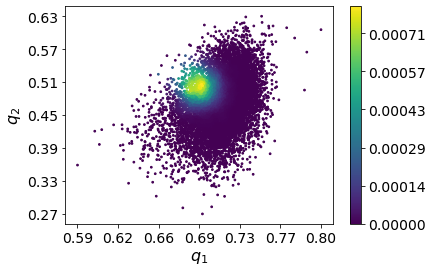

In [48]:
plt.scatter(pred_samples[:,0], pred_samples[:,1], cmap='viridis', c=rn_w, s=3)
plt.xlabel('$q_1$', fontsize=16)
plt.ylabel('$q_2$', fontsize=16)
plt.xticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)])
plt.yticks(fontsize=14,
           ticks=np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7),
           labels=["{:.2f}".format(x) for x in np.linspace(np.min(pred_samples[:,1]), np.max(pred_samples[:,1]), 7)])

cbar = plt.colorbar();
cbar.ax.set_yticklabels(["{:.5f}".format(x) for x in np.linspace(np.min(rn_w), np.max(rn_w), 9)],
                        fontsize=14);

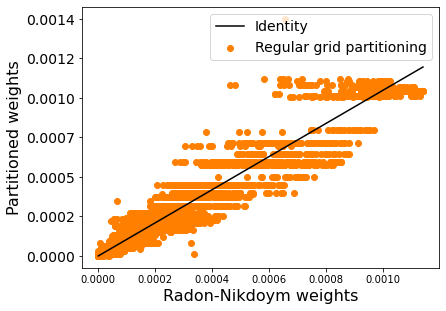

In [20]:
plt.figure(figsize=(6.4,4.8))
plt.plot(np.linspace(0, np.max(rn_w), 1000),
         np.linspace(0, np.max(rn_w), 1000), color='k', label='Identity')

plt.xlabel('Radon-Nikdoym weights', fontsize=16)
plt.ylabel('Partitioned weights', fontsize=16)
plt.scatter(rn_w, w, label='Regular grid partitioning', color='#ff7f00')
plt.yticks(fontsize=14,
           ticks=np.linspace(np.min(w), np.max(w), 7),
           labels=["{:.4f}".format(x) for x in np.linspace(np.min(w), np.max(w), 7)])
plt.legend(fontsize=14)
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_rgrid_2d_comp.png', bbox_inches='tight')

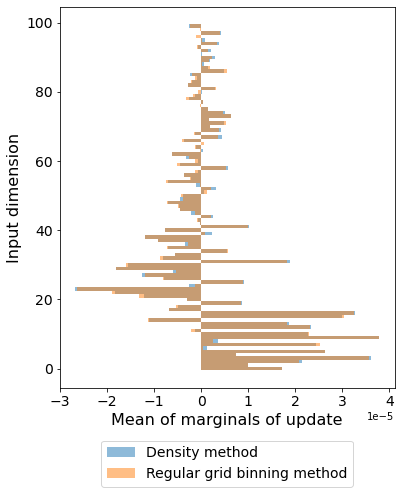

In [21]:
means_rn = np.mean((init_samples.T * rn_w).T, axis=0)
means_opt = np.mean((init_samples.T * w).T, axis=0)

plt.figure(figsize=(6,7))
plt.barh(range(100), means_rn, alpha=0.5, height=1, label='Density method')
plt.barh(range(100), means_opt, alpha=0.5, height=1, label='Regular grid binning method')
plt.xlabel('Mean of marginals of update', fontsize=16)
plt.ylabel('Input dimension', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='center', bbox_to_anchor=(0.5, -0.2))
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kl_rgrid_2d.png', bbox_inches='tight')

## 1d version to match 2018 paper

In [22]:
pred_samples_1d = pred_samples[:,:1]
obs_samples_1d = obs_samples[:,:1]

In [23]:
pred_KDE_1d = GKDE(pred_samples_1d.T)
obs_KDE_1d = GKDE(obs_samples_1d.T)
r_1d = obs_KDE_1d(pred_samples_1d.T) / pred_KDE_1d(pred_samples_1d.T)
rn_w_1d = r_1d / n_init_samples
PF_update_KDE_1d = GKDE(pred_samples_1d.T, weights=rn_w_1d)

print(np.mean(r_1d))

0.99653087545411


In [24]:
n_clusters = 40
w_1d, labels, centers, w_cluster = weights.computePartitionedWeights_kMeans_IID(init_samples,
                                                                             pred_samples_1d,
                                                                             sample_set_2=obs_samples_1d,
                                                                             n_clusters=n_clusters)

     pcost       dcost       gap    pres   dres
 0: -2.2799e-01 -4.0260e+01  4e+01  2e-16  1e+01
 1: -2.2802e-01 -6.6014e-01  4e-01  1e-15  1e-01
 2: -2.3004e-01 -2.6151e-01  3e-02  1e-15  1e-02
 3: -2.3908e-01 -2.5200e-01  1e-02  2e-15  9e-18
 4: -2.4014e-01 -2.4200e-01  2e-03  2e-15  8e-18
 5: -2.4053e-01 -2.4079e-01  3e-04  2e-15  7e-18
 6: -2.4059e-01 -2.4063e-01  4e-05  1e-15  7e-18
 7: -2.4060e-01 -2.4060e-01  7e-06  1e-15  8e-18
 8: -2.4060e-01 -2.4060e-01  1e-06  2e-15  5e-18
 9: -2.4060e-01 -2.4060e-01  2e-07  2e-15  7e-18
Optimal solution found.


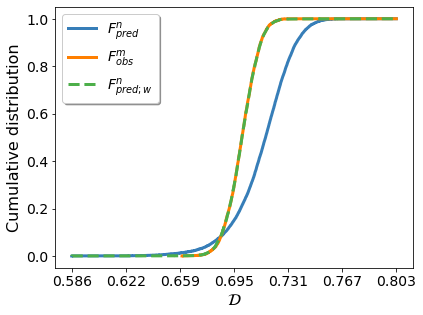

In [25]:
plt.figure(figsize=(6.4,4.8))

isort = np.argsort(pred_samples_1d[:,0])
isort_obs = np.argsort(obs_samples_1d[:,0])

plt.step(pred_samples_1d[isort], np.cumsum([1/n_init_samples]*n_init_samples),
         label='$F^n_{pred}$', c='#377eb8', linewidth=3)
plt.step(np.append(obs_samples_1d[isort_obs], [np.max(pred_samples_1d)]),
         np.append(np.cumsum([1/n_obs_samples]*n_obs_samples), [1]),
         label='$F^m_{obs}$', c='#ff7f00', linewidth=3)
plt.step(pred_samples_1d[isort], np.cumsum(w_1d[isort]),
         label='$F^n_{pred;w}$', c='#4daf4a', ls='dashed', linewidth=3)
plt.xticks(ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.3f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)],
           fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('$\mathcal{D}$', fontsize=16)
plt.ylabel('Cumulative distribution', fontsize=16)
plt.legend(fontsize=14, loc='upper left', shadow=True)
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kl_res_1d.png', bbox_inches='tight')

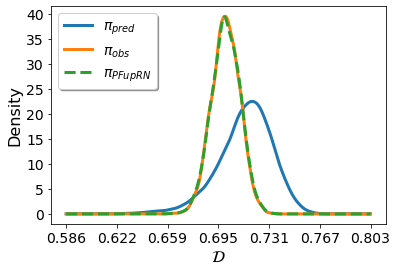

In [26]:
xx = np.linspace(np.min(pred_samples_1d), np.max(pred_samples_1d), 1000)
plt.plot(xx, pred_KDE_1d(xx), label='$\pi_{pred}$', linewidth=3)
plt.plot(xx, obs_KDE_1d(xx), label='$\pi_{obs}$', linewidth=3)
plt.plot(xx, PF_update_KDE_1d(xx), label='$\pi_{PFupRN}$', linewidth=3, ls='--')
plt.legend(fontsize=14)
plt.xticks(ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.3f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)],
           fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('$\mathcal{D}$', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(fontsize=14, loc='upper left', shadow=True)
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kl_res_dens_1d.png', bbox_inches='tight')

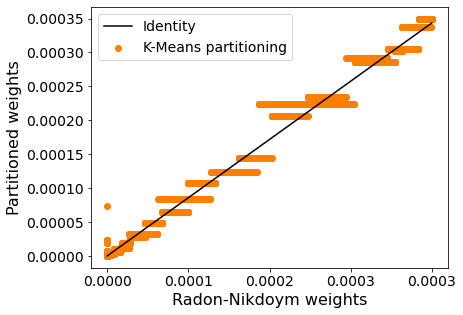

In [27]:
plt.figure(figsize=(6.4,4.8))
plt.plot(np.linspace(0, np.max(rn_w_1d), 1000),
         np.linspace(0, np.max(rn_w_1d), 1000), color='k', label='Identity')

plt.xlabel('Radon-Nikdoym weights', fontsize=16)
plt.ylabel('Partitioned weights', fontsize=16)
plt.scatter(rn_w_1d, w_1d, label='K-Means partitioning', color='#ff7f00')
plt.xticks(fontsize=14,
           ticks=np.linspace(np.min(rn_w_1d), np.max(rn_w_1d), 5),
           labels=["{:.4f}".format(x) for x in np.linspace(np.min(rn_w_1d), np.max(rn_w_1d), 5)])
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kmeans_comp_1d.png', bbox_inches='tight')

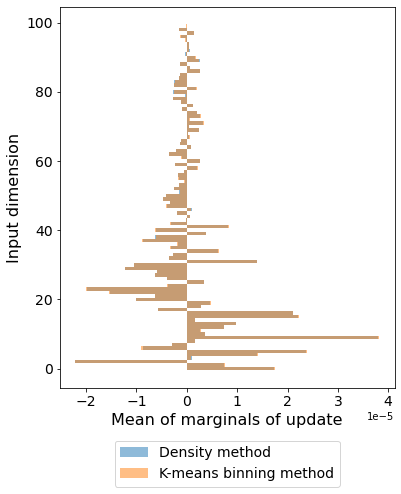

In [28]:
means_rn = np.mean((init_samples.T * rn_w_1d).T, axis=0)
means_opt = np.mean((init_samples.T * w_1d).T, axis=0)

plt.figure(figsize=(6,7))
plt.barh(range(100), means_rn, alpha=0.5, height=1, label='Density method')
plt.barh(range(100), means_opt, alpha=0.5, height=1, label='K-means binning method')
plt.legend()

plt.xlabel('Mean of marginals of update', fontsize=16)
plt.ylabel('Input dimension', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='center', bbox_to_anchor=(0.5, -0.2))
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kl_kmeans_1d.png', bbox_inches='tight')

In [29]:
n_bins = 40
w_1d, labels, centers, w_cluster = weights.computePartitionedWeights_regulargrid_IID(init_samples,
                                                                             pred_samples_1d,
                                                                             sample_set_2=obs_samples_1d,
                                                                             n_bins=n_bins)
print(len(centers))

     pcost       dcost       gap    pres   dres
 0: -1.9353e-01 -4.0261e+01  4e+01  2e-16  1e+01
 1: -1.9360e-01 -6.6137e-01  5e-01  1e-15  1e-01
 2: -1.9839e-01 -2.6018e-01  6e-02  1e-15  2e-02
 3: -2.2099e-01 -2.6399e-01  4e-02  6e-15  8e-18
 4: -2.2267e-01 -2.2752e-01  5e-03  1e-15  8e-18
 5: -2.2380e-01 -2.2570e-01  2e-03  2e-15  1e-17
 6: -2.2410e-01 -2.2432e-01  2e-04  2e-15  7e-18
 7: -2.2416e-01 -2.2420e-01  5e-05  3e-15  1e-17
 8: -2.2417e-01 -2.2418e-01  1e-05  2e-15  8e-18
 9: -2.2417e-01 -2.2417e-01  1e-06  3e-15  8e-18
10: -2.2417e-01 -2.2417e-01  2e-07  2e-15  9e-18
11: -2.2417e-01 -2.2417e-01  5e-08  1e-15  9e-18
Optimal solution found.
40


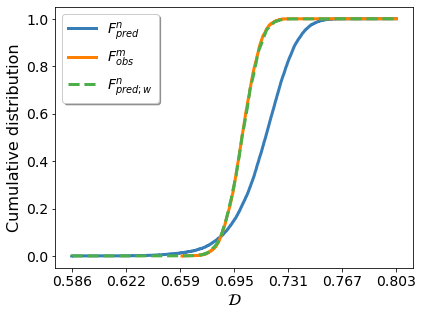

In [30]:
plt.figure(figsize=(6.4,4.8))

isort = np.argsort(pred_samples_1d[:,0])
isort_obs = np.argsort(obs_samples_1d[:,0])

plt.step(pred_samples_1d[isort], np.cumsum([1/n_init_samples]*n_init_samples),
         label='$F^n_{pred}$', c='#377eb8', linewidth=3)
plt.step(np.append(obs_samples_1d[isort_obs], [np.max(pred_samples_1d)]),
         np.append(np.cumsum([1/n_obs_samples]*n_obs_samples), [1]),
         label='$F^m_{obs}$', c='#ff7f00', linewidth=3)
plt.step(pred_samples_1d[isort], np.cumsum(w_1d[isort]),
         label='$F^n_{pred;w}$', c='#4daf4a', ls='dashed', linewidth=3)

plt.xticks(ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.3f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)],
           fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('$\mathcal{D}$', fontsize=16)
plt.ylabel('Cumulative distribution', fontsize=16)
plt.legend(fontsize=14, loc='upper left', shadow=True)
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kl_res_rgrid_1d.png', bbox_inches='tight')

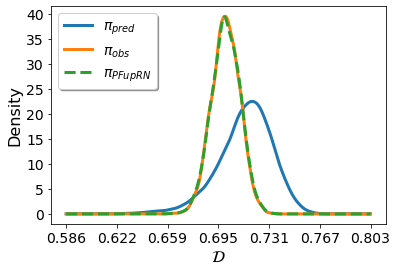

In [31]:
xx = np.linspace(np.min(pred_samples_1d), np.max(pred_samples_1d), 1000)
plt.plot(xx, pred_KDE_1d(xx), label='$\pi_{pred}$', linewidth=3)
plt.plot(xx, obs_KDE_1d(xx), label='$\pi_{obs}$', linewidth=3)
plt.plot(xx, PF_update_KDE_1d(xx), label='$\pi_{PFupRN}$', linewidth=3, ls='--')
plt.legend(fontsize=14)
plt.xticks(ticks=np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7),
           labels=["{:.3f}".format(x) for x in np.linspace(np.min(pred_samples[:,0]), np.max(pred_samples[:,0]), 7)],
           fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('$\mathcal{D}$', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(fontsize=14, loc='upper left', shadow=True)
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_kl_res_rgrid_dens_1d.png', bbox_inches='tight')

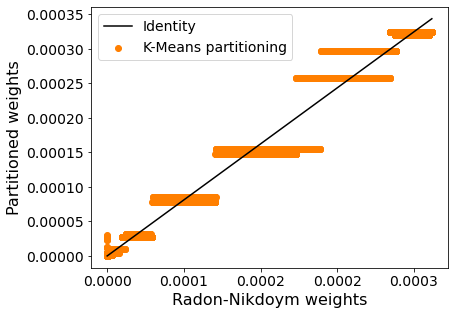

In [32]:
plt.figure(figsize=(6.4,4.8))
plt.plot(np.linspace(0, np.max(rn_w_1d), 1000),
         np.linspace(0, np.max(rn_w_1d), 1000), color='k', label='Identity')

plt.xlabel('Radon-Nikdoym weights', fontsize=16)
plt.ylabel('Partitioned weights', fontsize=16)
plt.scatter(rn_w_1d, w_1d, label='K-Means partitioning', color='#ff7f00')
plt.xticks(fontsize=14,
           ticks=np.linspace(np.min(w_1d), np.max(w_1d), 5),
           labels=["{:.4f}".format(x) for x in np.linspace(np.min(w_1d), np.max(w_1d), 5)])
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_rgrid_comp_1d.png', bbox_inches='tight')

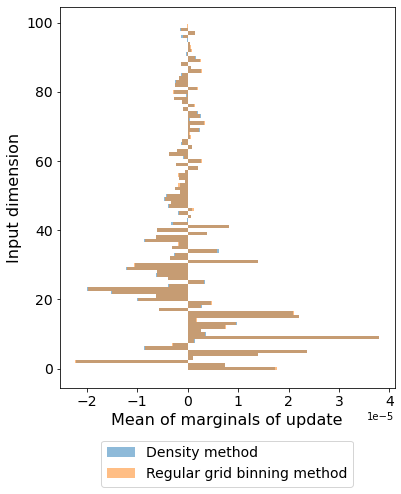

In [33]:
means_rn = np.mean((init_samples.T * rn_w_1d).T, axis=0)
means_opt = np.mean((init_samples.T * w_1d).T, axis=0)

plt.figure(figsize=(6,7))
plt.barh(range(100), means_rn, alpha=0.5, height=1, label='Density method')
plt.barh(range(100), means_opt, alpha=0.5, height=1, label='Regular grid binning method')
plt.legend()

plt.xlabel('Mean of marginals of update', fontsize=16)
plt.ylabel('Input dimension', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='center', bbox_to_anchor=(0.5, -0.2))
plt.savefig(f'/Users/kirana/Desktop/work/paper/ml_km_rgrid_1d.png', bbox_inches='tight')